In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv(r'C:\Users\KIRAN\OneDrive\Desktop\CSV Files\house_data.csv')

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

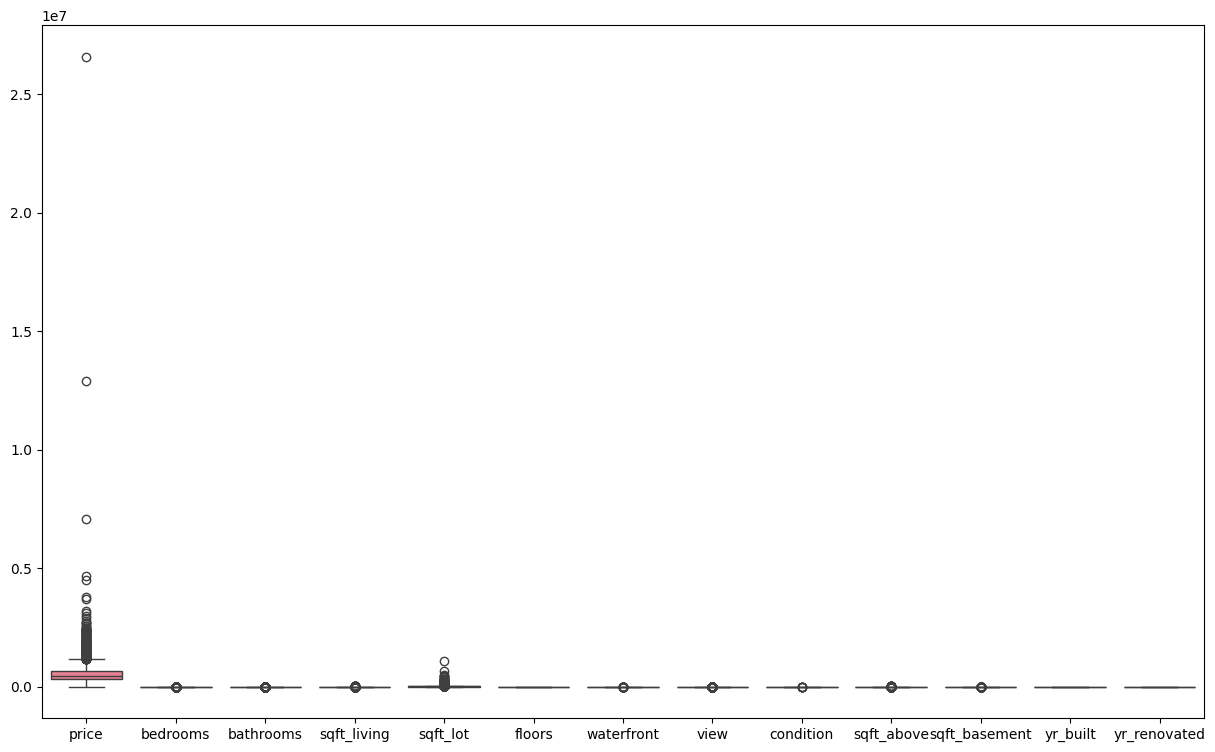

In [8]:
plt.figure(figsize=(15,9))
sns.boxplot(data= df,orient='v')
plt.show()

In [9]:
df.shape

(4600, 18)

In [10]:
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

outlier_percentages = {}
original_shape = df.shape[0]

for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        percentage = (outliers_count / original_shape) * 100
        outlier_percentages[col] = round(percentage, 2)

print("Outlier Percentages:")
for col, pct in outlier_percentages.items():
    print(f"{col}: {pct}%")

Outlier Percentages:
price: 5.22%
bedrooms: 2.57%
bathrooms: 3.07%
sqft_living: 2.8%
sqft_lot: 11.76%
sqft_above: 2.52%
sqft_basement: 1.78%
yr_built: 0.0%
yr_renovated: 0.0%


In [11]:
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"Removed outliers from {col}: {df.shape}")

print(f"Final shape after cleaning: {df.shape}")

Removed outliers from price: (4360, 18)
Removed outliers from bedrooms: (4260, 18)
Removed outliers from bathrooms: (4194, 18)
Removed outliers from sqft_living: (4137, 18)
Removed outliers from sqft_lot: (3677, 18)
Removed outliers from sqft_above: (3601, 18)
Removed outliers from sqft_basement: (3562, 18)
Removed outliers from yr_built: (3562, 18)
Removed outliers from yr_renovated: (3562, 18)
Final shape after cleaning: (3562, 18)


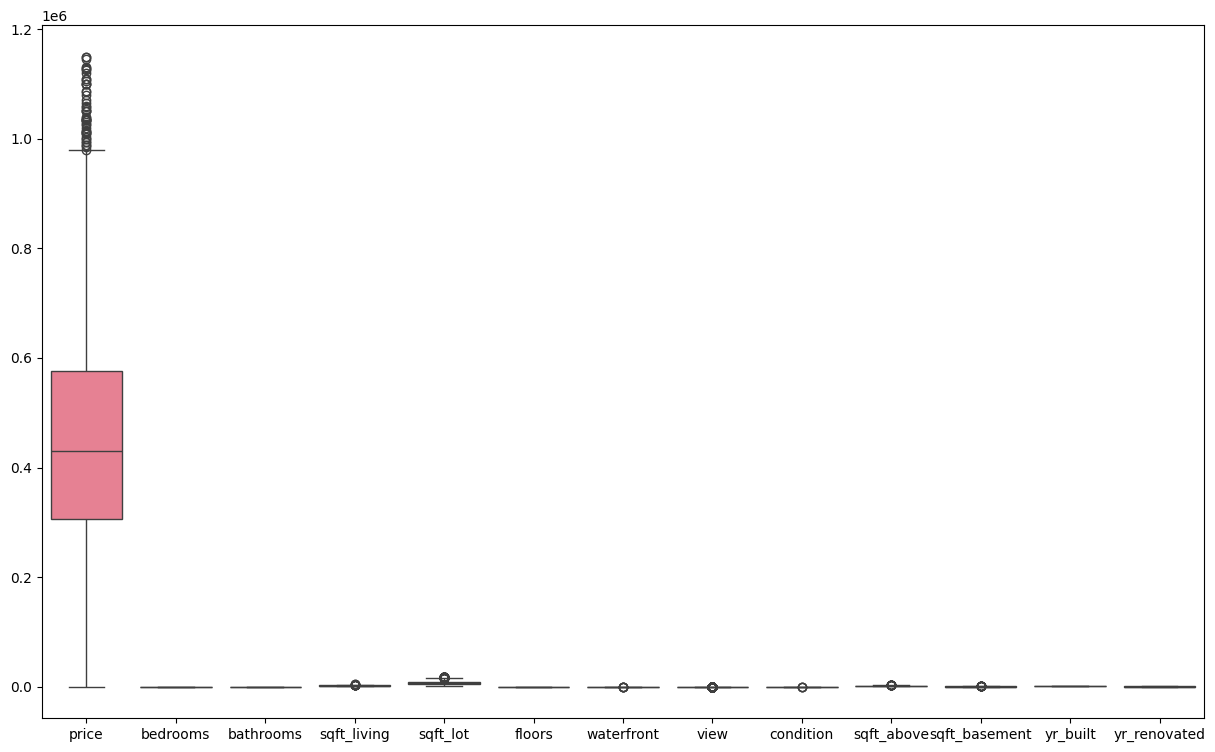

In [12]:
plt.figure(figsize=(15,9))
sns.boxplot(data= df,orient='v')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3562 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           3562 non-null   object 
 1   price          3562 non-null   float64
 2   bedrooms       3562 non-null   float64
 3   bathrooms      3562 non-null   float64
 4   sqft_living    3562 non-null   int64  
 5   sqft_lot       3562 non-null   int64  
 6   floors         3562 non-null   float64
 7   waterfront     3562 non-null   int64  
 8   view           3562 non-null   int64  
 9   condition      3562 non-null   int64  
 10  sqft_above     3562 non-null   int64  
 11  sqft_basement  3562 non-null   int64  
 12  yr_built       3562 non-null   int64  
 13  yr_renovated   3562 non-null   int64  
 14  street         3562 non-null   object 
 15  city           3562 non-null   object 
 16  statezip       3562 non-null   object 
 17  country        3562 non-null   object 
dtypes: float64(4)

In [14]:
# spliting the data
X = df.drop(columns=['price','date','street','city','statezip','country'])
y = df['price']


In [15]:
y.dtypes

dtype('float64')

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3562 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       3562 non-null   float64
 1   bathrooms      3562 non-null   float64
 2   sqft_living    3562 non-null   int64  
 3   sqft_lot       3562 non-null   int64  
 4   floors         3562 non-null   float64
 5   waterfront     3562 non-null   int64  
 6   view           3562 non-null   int64  
 7   condition      3562 non-null   int64  
 8   sqft_above     3562 non-null   int64  
 9   sqft_basement  3562 non-null   int64  
 10  yr_built       3562 non-null   int64  
 11  yr_renovated   3562 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 361.8 KB


In [17]:
y.info()

<class 'pandas.core.series.Series'>
Index: 3562 entries, 0 to 4599
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3562 non-null   float64
dtypes: float64(1)
memory usage: 55.7 KB


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]


In [21]:

meta_model = LinearRegression()



In [22]:
stack_reg = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stack_reg.fit(X_train, y_train)

,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.","[('rf', ...), ('gb', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA regressor which will be used to combine the base estimators.The default regressor is a :class:`~sklearn.linear_model.RidgeCV`.",LinearRegression()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",5
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples

In [23]:
y_pred = stack_reg.predict(X_test)

In [26]:
stack_reg.score(X_train,y_train)

0.6424484336670717

In [24]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.391522326212437


In [25]:
from sklearn.metrics import mean_squared_error
print("RMSE: $", np.sqrt(mean_squared_error(y_test, y_pred)).round(0))

RMSE: $ 157624.0
